In [1]:
%cd ..
%cd ..

/home/wu/repo/gesture-wgan/tools
/home/wu/repo/gesture-wgan


In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [40]:
with open("data/takekuchi/processed/prosody/X_dev.p", 'rb') as f:
    prosody_dev = pickle.load(f)
with open("data/takekuchi/processed/prosody/sample_id_dev.p", 'rb') as f:
    sample_id_dev = pickle.load(f)
with open("data/takekuchi/processed/prosody/X_test.p", 'rb') as f:
    prosody_test = pickle.load(f)
with open("data/takekuchi/processed/prosody/sample_id_test.p", 'rb') as f:
    sample_id_test = pickle.load(f)

prosodys = prosody_dev + prosody_test
sample_ids = sample_id_dev + sample_id_test

# filter out longer than 10 seconds
prosodys, sample_ids = zip(*[(x, sid) for x, sid in zip(prosodys, sample_ids) if len(x) > 200 and len(x) < 400])

In [45]:
sample_ids

('1093',
 '1107',
 '1115',
 '1119',
 '1121',
 '1125',
 '1127',
 '1129',
 '1131',
 '1133',
 '1139',
 '1143',
 '1145',
 '1151',
 '1153',
 '1159',
 '1161',
 '1163',
 '1165',
 '1177',
 '1094',
 '1096',
 '1102',
 '1108',
 '1112',
 '1114',
 '1120',
 '1126',
 '1128',
 '1130',
 '1132',
 '1134',
 '1138',
 '1142',
 '1144',
 '1148',
 '1152',
 '1154',
 '1162',
 '1164',
 '1168')

In [41]:
# mean and std by f0, 2nd dim

def nan_mean(x):
    nan_value = np.finfo(x.dtype).eps
    x[x==nan_value] = np.nan
    return np.nanmean(x)

def nan_std(x):
    nan_value = np.finfo(x.dtype).eps
    x[x==nan_value] = np.nan
    return np.nanstd(x)

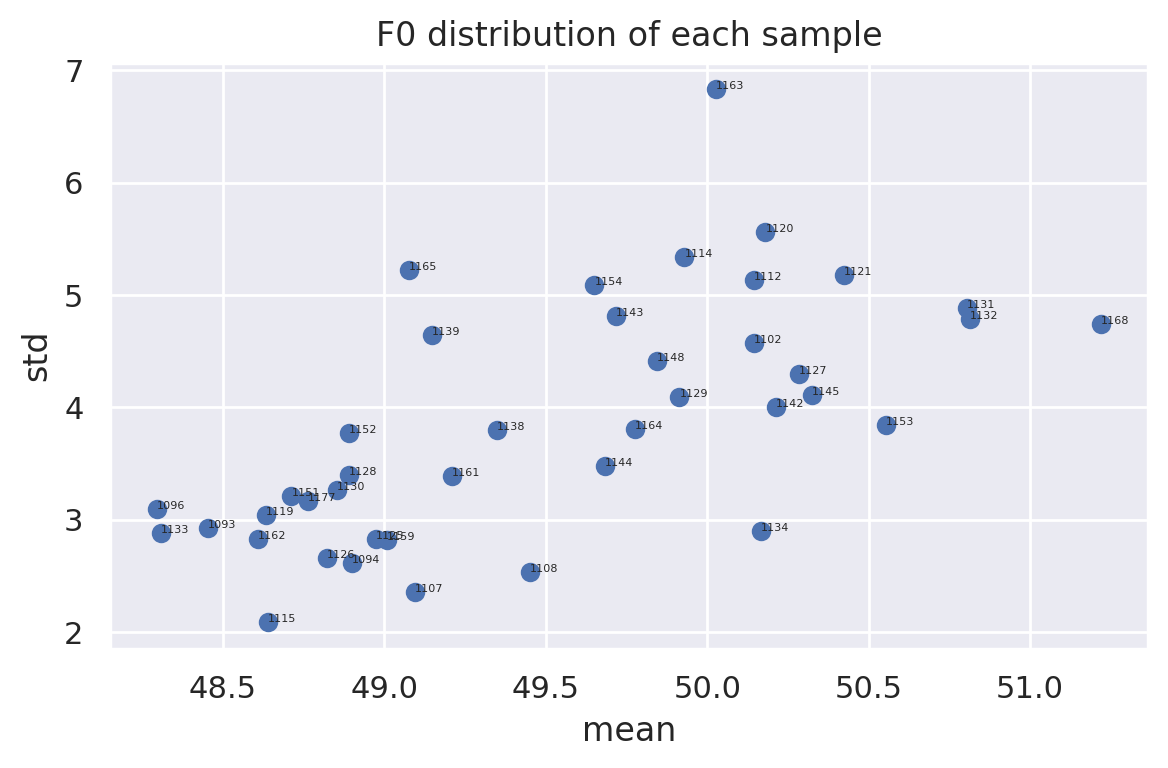

In [42]:
plt.figure(dpi=200)

means, stds = zip(*[(nan_mean(x[:, 1]), nan_std(x[:, 1])) for x in prosodys])
plt.scatter(means, stds)
for i, sample_id in enumerate(sample_ids):
    plt.annotate(str(sample_id), (means[i], stds[i]), size=4)

plt.title("F0 distribution of each sample")
plt.ylabel("std")
plt.xlabel("mean")
plt.tight_layout()
plt.show()

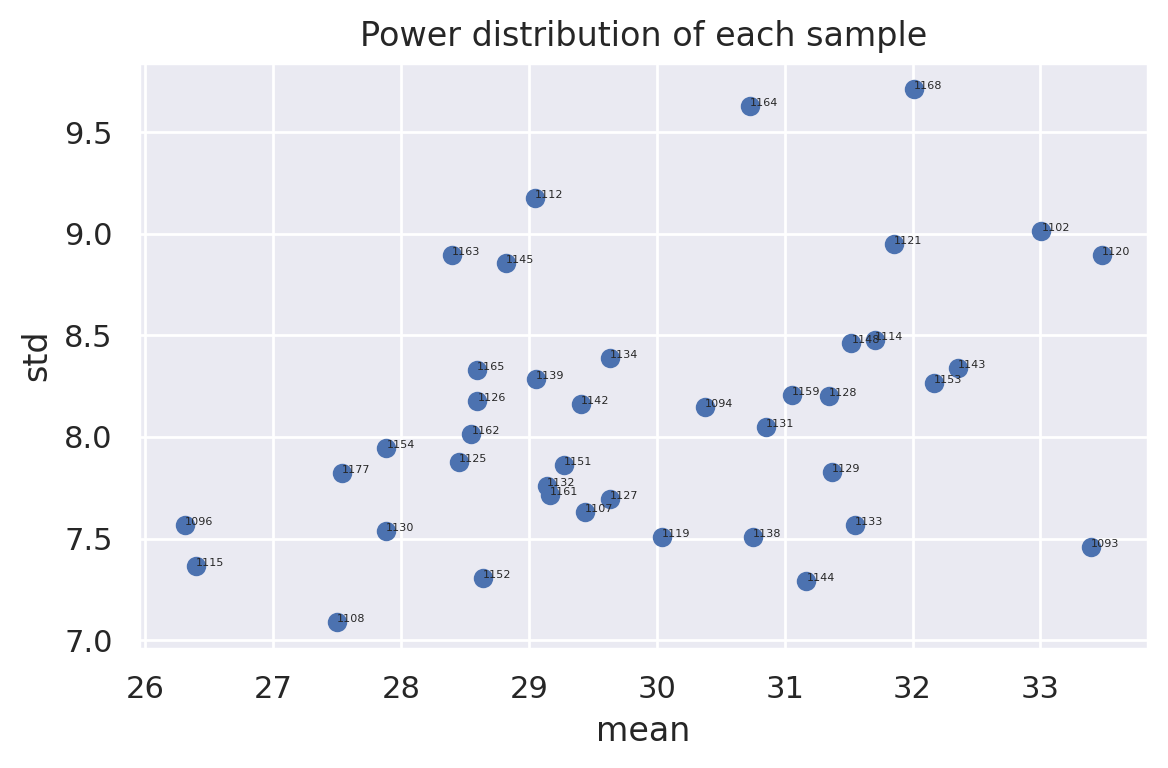

In [43]:
plt.figure(dpi=200)

means, stds = zip(*[(nan_mean(x[:, 0]), nan_std(x[:, 0])) for x in prosodys])
plt.scatter(means, stds)
for i, sample_id in enumerate(sample_ids):
    plt.annotate(str(sample_id), (means[i], stds[i]), size=4)

plt.title("Power distribution of each sample")
plt.ylabel("std")
plt.xlabel("mean")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(dpi=200)

means, stds = zip(*[(nan_mean(x[:, 1]), nan_std(x[:, 1])) for x in prosodys])
plt.scatter(means, stds)
for i, sample_id in enumerate(sample_ids):
    plt.annotate(str(sample_id), (means[i], stds[i]), size=4)

means, stds = zip(*[(nan_mean(x[:, 1]), nan_std(x[:, 1])) for x in prosodys])

plt.title("F0 distribution of each sample")
plt.ylabel("std")
plt.xlabel("mean")
plt.tight_layout()
plt.show()